In [1]:
plt = plotter()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import jax
import jax.numpy as np
import optax

In [70]:
import rl_simple as rls

In [83]:
θp, θv = rls.solve_iterate(R=2000, Δp=0.1, Δv=0.1)
θp, θv

(DeviceArray([ 1.052102  ,  0.01171099, -0.01069804,  0.00297353], dtype=float32),
 DeviceArray([-0.9161132,  1.8100127, -1.230602 ,  0.2358243], dtype=float32))

In [84]:
pgrad = rls.grad_policy_obj(θp, θv)
vgrad = rls.grad_value_obj(θp, θv)
pgrad, vgrad

(DeviceArray([-1.0229826e-05,  2.7687347e-06,  9.2410410e-06,
              -4.2240176e-06], dtype=float32),
 DeviceArray([ 1.3765911e-04,  1.0899024e-04, -8.1283368e-05,
               1.7763854e-05], dtype=float32))

In [85]:
poly = rls.pol_vec(rls.xgrid, θp)
value = rls.val_vec(rls.xgrid, θv)
valuep = rls.eval_policy_vec(rls.xgrid, θp, θv)

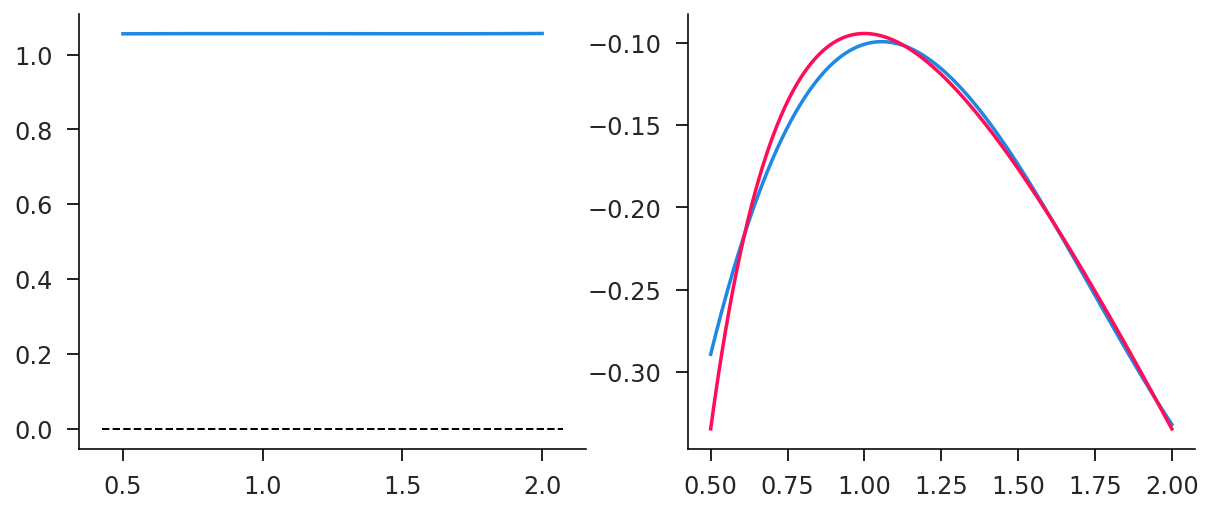

In [86]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))
ax0.plot(rls.xgrid, poly)
ax1.plot(rls.xgrid, value, rls.xgrid, valuep)
ax0.hlines(0, *ax0.get_xlim(), color='k', linestyle='--', linewidth=1)
ax0.scatter(0, 0, color='k', zorder=10);